In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Cargar Datos
Data = pd.read_csv('./Cardetails.csv')

#Mostrar Datos
Data.head(5)

,nombre,ano,precio_de_venta,km_recorridos,combustible,tipo_vendedor,transmision,propietario,kilometraje,motor,potencia_maxima,par,asientos
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#Descripcion de los datos
Data.describe()

,ano,precio_de_venta,km_recorridos,asientos
count,7787.000000,7.787000e+03,7.787000e+03,7566.000000
mean,2014.054193,6.566975e+05,6.840663e+04,5.422284
std,3.911379,8.174188e+05,5.663441e+04,0.955162
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.750000e+05,3.300150e+04,5.000000
50%,2015.000000,4.599990e+05,6.000000e+04,5.000000
75%,2017.000000,6.965000e+05,9.000000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [3]:
# Manejar datos faltantes
Data.replace(0, np.nan, inplace=True)
Data.fillna(Data.mean(numeric_only=True), inplace=True)
Data.fillna('NA',inplace=True)

In [4]:
#Mostrar Datos
Data.head(5)

,nombre,ano,precio_de_venta,km_recorridos,combustible,tipo_vendedor,transmision,propietario,kilometraje,motor,potencia_maxima,par,asientos
0,Maruti Swift Dzire VDI,2014.000000,450000.000000,145500.000000,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.000000
1,Skoda Rapid 1.5 TDI Ambition,2014.000000,370000.000000,120000.000000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.000000
2,"Honda City 2017-2020 EXi,2006,158000,140000,Pe...",2014.054193,656697.467317,68406.631694,NA,NA,NA,NA,NA,NA,NA,NA,5.422284
3,Hyundai i20 Sportz Diesel,2010.000000,225000.000000,127000.000000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.000000
4,"Maruti Swift VXI BSIII,2007,130000,120000,Petr...",2014.054193,656697.467317,68406.631694,NA,NA,NA,NA,NA,NA,NA,NA,5.422284


In [5]:
# Confirmacion de columnas
print(Data.columns)

Index(['nombre', 'ano', 'precio_de_venta', 'km_recorridos', 'combustible',
       'tipo_vendedor', 'transmision', 'propietario', 'kilometraje', 'motor',
       'potencia_maxima', 'par', 'asientos'],
      dtype='object')


<Axes: xlabel='km_recorridos'>

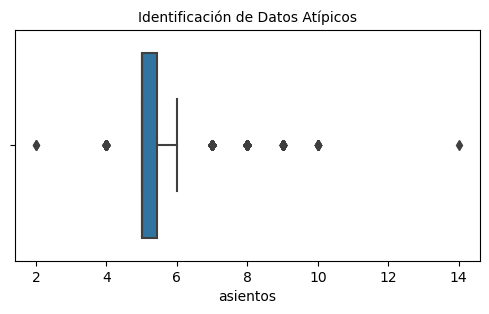

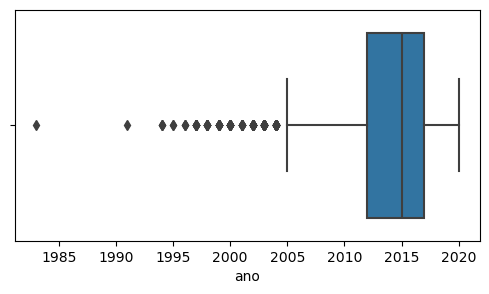

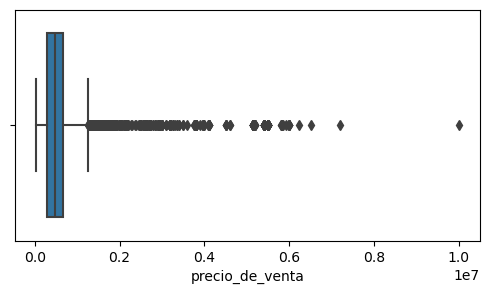

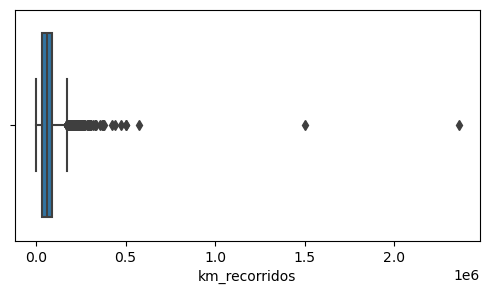

In [6]:
# Análisis exploratorio de datos

# Variable "asientos"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['asientos'])
plt.title('Identificación de Datos Atípicos', fontsize=10)

# Variable "ano"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['ano'])

# Variable "precio_de venta"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['precio_de_venta'])

# Variable "km_recorridos"
plt.figure(figsize=(6, 3))
sns.boxplot(x=Data['km_recorridos'])

In [7]:
# Definir límites para datos atípicos
max_asientos = 10
min_asientos = 2
total_asientos = ((Data['asientos'] < min_asientos) | (Data['asientos'] > max_asientos)).sum()

max_ano = 2020
min_ano = 1990
total_ano = ((Data['ano'] < min_ano) | (Data['ano'] > max_ano)).sum()

print("Total registros dataset: {}".format(len(Data)))
print("El total de datos atípicos para la cantidad de asientos es {}".format(total_asientos))
print("El total de datos atípicos para el año es {}".format(total_ano))
print("")
Data.info()

Total registros dataset: 8128
El total de datos atípicos para la cantidad de asientos es 1
El total de datos atípicos para el año es 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nombre           8128 non-null   object 
 1   ano              8128 non-null   float64
 2   precio_de_venta  8128 non-null   float64
 3   km_recorridos    8128 non-null   float64
 4   combustible      8128 non-null   object 
 5   tipo_vendedor    8128 non-null   object 
 6   transmision      8128 non-null   object 
 7   propietario      8128 non-null   object 
 8   kilometraje      8128 non-null   object 
 9   motor            8128 non-null   object 
 10  potencia_maxima  8128 non-null   object 
 11  par              8128 non-null   object 
 12  asientos         8128 non-null   float64
dtypes: float64(4), object(9)
memory usage: 825.6+ KB


In [8]:
#Ajustar columnas tipo object para poder procesarlos en el modelo

data_numerica = Data.copy()
for column in data_numerica.columns:
    if data_numerica[column].dtype == 'object':
        label_encoder = LabelEncoder()
        data_numerica[column] = label_encoder.fit_transform(data_numerica[column])

In [9]:
# Dividir los datos en conjunto de entrenamiento y prueba
X = data_numerica.drop('precio_de_venta', axis=1)
Y = data_numerica['precio_de_venta']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [10]:
#Validar datos en train
X_train.head(2)

,nombre,ano,km_recorridos,combustible,tipo_vendedor,transmision,propietario,kilometraje,motor,potencia_maxima,par,asientos
4313,782,2012.000000,40000.000000,4,1,1,0,239,10,239,22,5.000000
5178,1593,2014.054193,68406.631694,3,2,2,2,381,117,305,376,5.422284


In [11]:
#Validar datos en test
X_test.head(2)

,nombre,ano,km_recorridos,combustible,tipo_vendedor,transmision,propietario,kilometraje,motor,potencia_maxima,par,asientos
3558,871,2013.0,40000.0,1,1,1,0,293,23,277,182,5.0
233,1082,2013.0,70000.0,1,1,1,0,44,91,93,265,7.0


In [12]:
# Crear y entrenar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

LinearRegression()

In [15]:
# Realizar predicciones
Prediccion = modelo_regresion.predict(X_test)

In [16]:
# Evaluar el modelo
print('Coeficientes:', modelo_regresion.coef_)
print('Error cuadrático medio:', mean_squared_error(Y_test, Prediccion))
print('Coeficiente de determinación (R^2):', r2_score(Y_test, Prediccion))

Coeficientes: [-1.07080196e+02  8.50260316e+04 -8.22161145e-01 -1.46003226e+05
 -7.38159137e+04 -7.01205378e+05 -4.12534190e+03 -1.94685337e+03
  2.80003671e+03  5.66472374e+02  1.22643962e+03 -1.08561366e+05]
Error cuadrático medio: 363151528857.16675
Coeficiente de determinación (R^2): 0.4424242844222146


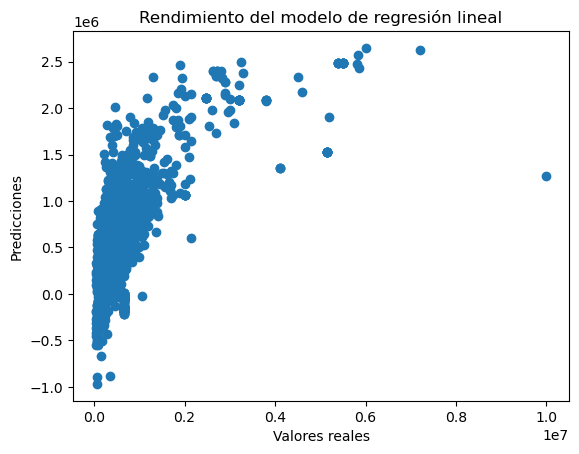

In [17]:
# Visualizar el rendimiento del modelo
plt.scatter(Y_test, Prediccion)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Rendimiento del modelo de regresión lineal")
plt.show()